In [1]:
import sys, os
sys.path.insert(1, '/nfs/cms/martialc/DTUpgrade/src')

%load_ext autoreload
%autoreload 2

In [2]:
import dtupy_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from pathlib import Path
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

import dtupy_analysis.dqm as dqm
from dtupy_analysis.dqm.pairing import LnL
from dtupy_analysis.dqm.reco import MuSGO, MuSTIO, MuSE, SegDF
from dtupy_analysis.dqm import units as u, TDCTime
from dtupy_analysis.dqm.core import MuData
from dtupy_analysis.utils.paths import load_yaml
from dtupy_analysis.dqm.pairing import pair_hits, distance_matrix, matrix_diff

In [3]:
patt_dict = load_yaml('/nfs/cms/martialc/DTUpgrade/cfg/dqm/reco/pattern.yaml')

In [4]:
file_path = '/nfs/cms/martialc/DTUpgrade/data/cosmic_240904_long.seg'

with dqm.MuFile(file_path, batch_size=1e3,f_overlap=0.3) as file:
    for i, data in enumerate(file):
        break
mudata = data


In [5]:
musls = mudata.make_segments()
musl = musls[1]

for i, hits in musl.segments[LnL((4))].items():
    d = musl.data.loc[hits].set_index('layer').sort_index(ascending=False)
    global_cell = d.cell + pd.Series((0,0.5,0,0.5), index=d.index)
    
    # pattID = ''.join(['R' if cell_diff == 0.5 else 'L' if cell_diff == -0.5 else 'X' for cell_diff in global_cell.diff().dropna()])
    pattID = ''.join(['R' if cell_diff > 0 else 'L' for cell_diff in global_cell.diff().dropna()])

    if 'X' in pattID: continue
    display(d)
    display(f'{pattID}: {d.cell.to_list()} ({global_cell.diff().dropna().tolist()})')

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,3312,10,38,15,6,0,38641,1,1,30
3,3304,9,44,15,6,0,38641,1,1,20
2,3311,10,108,15,6,0,38641,1,1,14
1,3306,9,48,15,6,0,38641,1,1,24


'LRL: [10, 9, 10, 9] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1634,9,47,14,6,0,36537,1,1,27
3,1629,8,195,14,6,0,36537,1,1,10
2,1641,8,197,14,6,0,36537,1,1,0
1,1635,8,54,14,6,0,36537,1,1,8


'LLR: [9, 8, 8, 8] ([-0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2194,4,45,15,5,0,36754,1,1,1
3,2205,4,125,15,5,0,36754,1,1,3
2,2201,4,194,15,5,0,36754,1,1,28
1,2197,4,126,15,5,0,36754,1,1,0


'RLR: [4, 4, 4, 4] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2388,3,198,14,4,0,30190,1,1,2
3,2401,2,202,14,4,0,30190,1,1,28
2,2393,3,200,14,4,0,30190,1,1,8
1,2390,2,196,14,4,0,30190,1,1,29


'LRL: [3, 2, 3, 2] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,54,10,38,15,6,0,36874,1,1,20
3,52,10,109,15,6,0,36874,1,1,15
2,60,11,36,15,6,0,36874,1,1,25
1,67,11,113,15,6,0,36874,1,1,1


'RRR: [10, 10, 11, 11] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1805,6,148,15,5,0,38157,1,1,24
3,1791,6,222,15,5,0,38157,1,1,23
2,1795,7,192,15,5,0,38157,1,1,9
1,1808,7,46,15,5,0,38157,1,1,4


'RRR: [6, 6, 7, 7] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2541,1,215,14,4,0,36629,1,1,0
3,2552,1,199,14,4,0,36629,1,1,2
2,2540,1,104,14,4,0,36629,1,1,20
1,2539,1,213,14,4,0,36629,1,1,10


'RLR: [1, 1, 1, 1] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,3224,15,53,14,7,0,37255,1,1,5
3,3223,14,208,14,7,0,37255,1,1,9
2,3225,15,41,14,7,0,37255,1,1,0
1,3221,14,52,14,7,0,37255,1,1,27


'LRL: [15, 14, 15, 14] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1594,9,47,14,6,0,38258,1,1,28
3,1593,8,195,14,6,0,38258,1,1,27
2,1594,9,49,14,6,0,38258,1,1,24
1,1594,8,54,14,6,0,38258,1,1,9


'LRL: [9, 8, 9, 8] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2505,9,47,15,6,0,36986,1,1,14
3,2500,9,44,15,6,0,36986,1,1,7
2,2503,9,49,15,6,0,36986,1,1,9
1,2502,9,48,15,6,0,36986,1,1,31


'RLR: [9, 9, 9, 9] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2352,3,198,14,4,0,36712,1,1,16
3,2347,2,202,14,4,0,36712,1,1,25
2,2348,3,200,14,4,0,36712,1,1,3
1,2355,3,124,14,4,0,36712,1,1,7


'LRR: [3, 2, 3, 3] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2484,4,45,14,5,0,37768,1,1,0
3,2479,4,125,14,5,0,37768,1,1,8
2,2476,5,139,14,5,0,37768,1,1,20
1,2479,5,144,14,5,0,37768,1,1,9


'RRR: [4, 4, 5, 5] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,636,14,51,15,7,0,37617,1,1,4
3,646,13,127,15,7,0,37617,1,1,20
2,632,14,50,15,7,0,37617,1,1,3
1,644,14,52,15,7,0,37617,1,1,1


'LRR: [14, 13, 14, 14] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2103,1,215,14,4,0,38492,1,1,24
3,2114,0,220,14,4,0,38492,1,1,17
2,2107,1,104,14,4,0,38492,1,1,9
1,2099,0,225,14,4,0,38492,1,1,0


'LRL: [1, 0, 1, 0] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2388,3,198,15,4,0,30190,1,1,2
3,2401,2,202,15,4,0,30190,1,1,28
2,2393,3,200,15,4,0,30190,1,1,8
1,2390,2,196,15,4,0,30190,1,1,29


'LRL: [3, 2, 3, 2] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1163,11,110,14,6,0,37360,1,1,25
3,1159,10,109,14,6,0,37360,1,1,17
2,1151,11,36,14,6,0,37360,1,1,9
1,1162,11,113,14,6,0,37360,1,1,11


'LRR: [11, 10, 11, 11] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2541,1,215,15,4,0,36629,1,1,0
3,2552,1,199,15,4,0,36629,1,1,2
2,2540,1,104,15,4,0,36629,1,1,20
1,2539,1,213,15,4,0,36629,1,1,10


'RLR: [1, 1, 1, 1] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,54,10,38,14,6,0,36874,1,1,20
3,52,10,109,14,6,0,36874,1,1,15
2,60,11,36,14,6,0,36874,1,1,25
1,67,11,113,14,6,0,36874,1,1,1


'RRR: [10, 10, 11, 11] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1594,9,47,15,6,0,38258,1,1,28
3,1593,8,195,15,6,0,38258,1,1,27
2,1594,9,49,15,6,0,38258,1,1,24
1,1594,8,54,15,6,0,38258,1,1,9


'LRL: [9, 8, 9, 8] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2194,4,45,14,5,0,36754,1,1,1
3,2205,4,125,14,5,0,36754,1,1,3
2,2201,4,194,14,5,0,36754,1,1,28
1,2197,4,126,14,5,0,36754,1,1,0


'RLR: [4, 4, 4, 4] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1634,9,47,15,6,0,36537,1,1,27
3,1629,8,195,15,6,0,36537,1,1,10
2,1641,8,197,15,6,0,36537,1,1,0
1,1635,8,54,15,6,0,36537,1,1,8


'LLR: [9, 8, 8, 8] ([-0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1805,6,148,14,5,0,38157,1,1,24
3,1791,6,222,14,5,0,38157,1,1,23
2,1795,7,192,14,5,0,38157,1,1,9
1,1808,7,46,14,5,0,38157,1,1,4


'RRR: [6, 6, 7, 7] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,3224,15,53,15,7,0,37255,1,1,5
3,3223,14,208,15,7,0,37255,1,1,9
2,3225,15,41,15,7,0,37255,1,1,0
1,3221,14,52,15,7,0,37255,1,1,27


'LRL: [15, 14, 15, 14] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2352,3,198,15,4,0,36712,1,1,16
3,2347,2,202,15,4,0,36712,1,1,25
2,2348,3,200,15,4,0,36712,1,1,3
1,2355,3,124,15,4,0,36712,1,1,7


'LRR: [3, 2, 3, 3] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2505,9,47,14,6,0,36986,1,1,14
3,2500,9,44,14,6,0,36986,1,1,7
2,2503,9,49,14,6,0,36986,1,1,9
1,2502,9,48,14,6,0,36986,1,1,31


'RLR: [9, 9, 9, 9] ([0.5, -0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2484,4,45,15,5,0,37768,1,1,0
3,2479,4,125,15,5,0,37768,1,1,8
2,2476,5,139,15,5,0,37768,1,1,20
1,2479,5,144,15,5,0,37768,1,1,9


'RRR: [4, 4, 5, 5] ([0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2103,1,215,15,4,0,38492,1,1,24
3,2114,0,220,15,4,0,38492,1,1,17
2,2107,1,104,15,4,0,38492,1,1,9
1,2099,0,225,15,4,0,38492,1,1,0


'LRL: [1, 0, 1, 0] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,636,14,51,14,7,0,37617,1,1,4
3,646,13,127,14,7,0,37617,1,1,20
2,632,14,50,14,7,0,37617,1,1,3
1,644,14,52,14,7,0,37617,1,1,1


'LRR: [14, 13, 14, 14] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,2843,12,37,14,7,0,38704,1,1,1
3,2854,11,112,14,6,0,38704,1,1,13
2,2839,12,114,14,7,0,38704,1,1,28
1,2851,12,128,14,7,0,38704,1,1,8


'LRR: [12, 11, 12, 12] ([-0.5, 0.5, 0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,3312,10,38,14,6,0,38641,1,1,30
3,3304,9,44,14,6,0,38641,1,1,20
2,3311,10,108,14,6,0,38641,1,1,14
1,3306,9,48,14,6,0,38641,1,1,24


'LRL: [10, 9, 10, 9] ([-0.5, 0.5, -0.5])'

,bx,cell,channel,link,obdt_ctr,obdt_type,orbit,sl,station,tdc
layer,,,,,,,,,,
4,1163,11,110,15,6,0,37360,1,1,25
3,1159,10,109,15,6,0,37360,1,1,17
2,1151,11,36,15,6,0,37360,1,1,9
1,1162,11,113,15,6,0,37360,1,1,11


'LRR: [11, 10, 11, 11] ([-0.5, 0.5, 0.5])'

0it [00:00, ?it/s]

/nfs/cms/martialc/DTUpgrade/src/dtupy_analysis/dqm/pairing/pandas_backend.py:59: RuntimeWarning: divide by zero encountered in log10
  d_total = (d_cell + np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT)) + d_idx)
/nfs/cms/martialc/DTUpgrade/src/dtupy_analysis/dqm/pairing/pandas_backend.py:59: RuntimeWarning: divide by zero encountered in log10
  d_total = (d_cell + np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT)) + d_idx)
/nfs/cms/martialc/DTUpgrade/src/dtupy_analysis/dqm/pairing/pandas_backend.py:59: RuntimeWarning: divide by zero encountered in log10
  d_total = (d_cell + np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT)) + d_idx)
/nfs/cms/martialc/DTUpgrade/src/dtupy_analysis/dqm/pairing/pandas_backend.py:59: RuntimeWarning: divide by zero encountered in log10
  d_total = (d_cell + np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT)) + d_idx)


<BarContainer object of 8 artists>

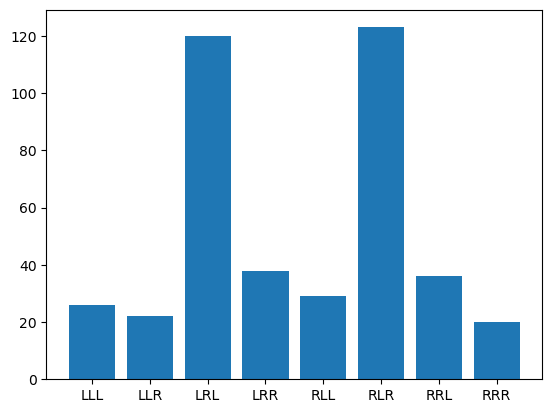

In [6]:
hist_pattID = {pattID : 0 for pattID in patt_dict.keys()}
with dqm.MuFile(file_path, batch_size=1e3,f_overlap=0.3) as file:
    for i, data in tqdm(enumerate(file)):
        try:
            musls = data.make_segments()
            musl = musls[1]
            for i, hits in musl.segments['4w3w2w1'].items():
                d = musl.data.loc[hits].set_index('layer').sort_index(ascending=False)
                d['hit'] = hits
                global_cell = d.cell + pd.Series((0,0.5,0,0.5), index=d.index)
                pattID = ''.join(['R' if cell_diff == 0.5 else 'L' if cell_diff == -0.5 else 'X' for cell_diff in global_cell.diff().dropna()])
                
                hist_pattID[pattID] += 1
        except KeyboardInterrupt:
            break
plt.bar(hist_pattID.keys(), hist_pattID.values())

# Study diff

array([[ 3],
       [ 3],
       [15],
       [15],
       [ 0],
       [ 0]], dtype=uint8)

array([[ 2, 14,  2, 14,  5,  5]], dtype=uint8)

[[ -1  11  -1  11   2   2]
 [ -1  11  -1  11   2   2]
 [-13  -1 -13  -1 -10 -10]
 [-13  -1 -13  -1 -10 -10]
 [  2  14   2  14   5   5]
 [  2  14   2  14   5   5]]


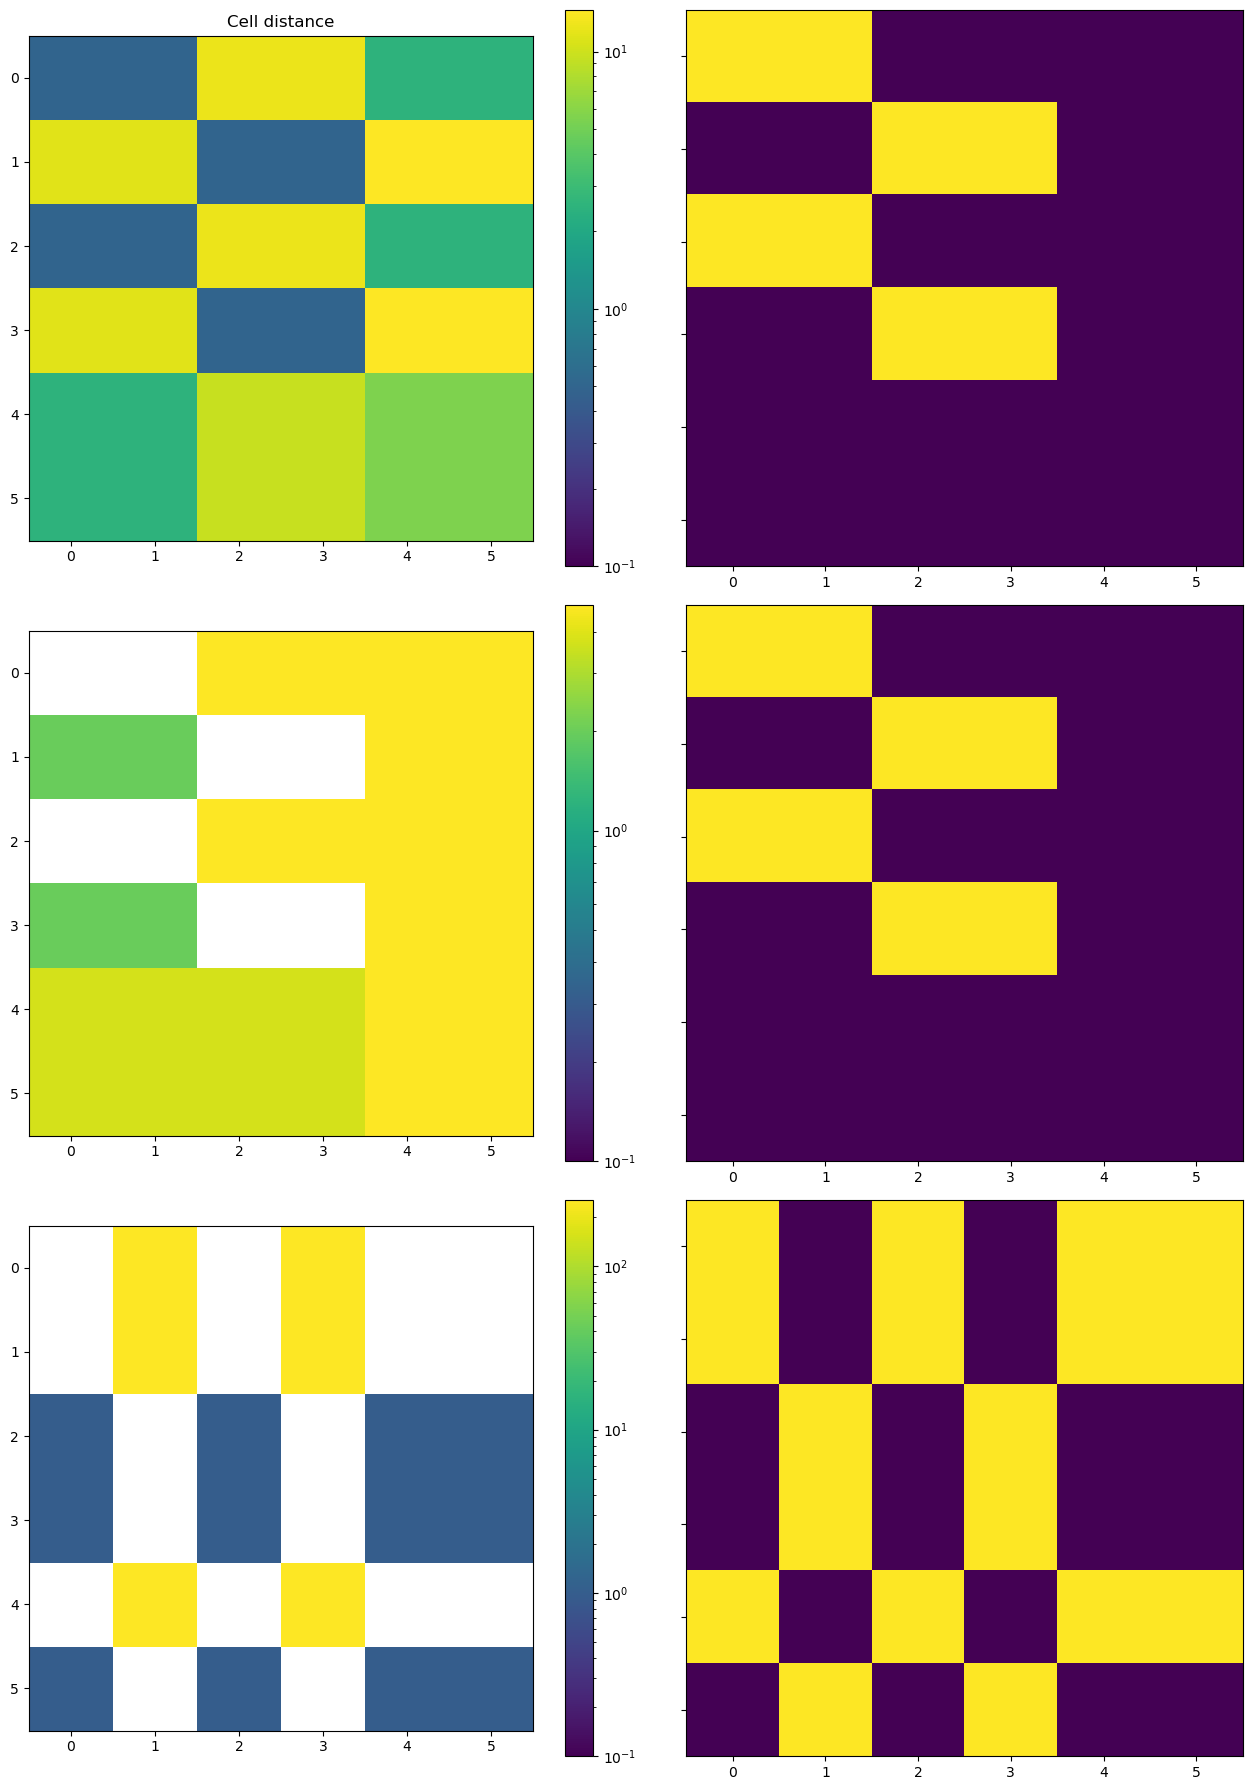

In [6]:
l_bot = 1
l_top = 2
df = mudata.get_ssl(1,1).data

display(np.reshape(df[df.layer == l_top].cell.to_numpy(), (-1,1)))
display(np.reshape(df[df.layer == l_bot].cell.to_numpy(), (1,-1)))

df_ssl = df.copy().reset_index(names=['r_index'])
# Time distance
d_bx    = matrix_diff(df_ssl, l_bot, l_top, 'bx')                           # "This should be 0", come hits may come from a previous orbit, so not always true 
d_tdc   = matrix_diff(df_ssl, l_bot, l_top, 'tdc')
if 'orbit' in df_ssl.columns:
    d_ob = matrix_diff(df_ssl, l_bot, l_top, 'orbit')
else:
    d_ob = np.zeros_like(d_tdc)
d_tdct  = np.abs(TDCTime(d_ob, d_bx, d_tdc).astype(int))               # We need to account for the clock reset so we use the module (32*3556) tdc times per cycle and THIS difference should be less than 32

# Pseudo-distance in time
d_idx  = np.abs(matrix_diff(df_ssl, l_bot, l_top, 'r_index', f = np.log10))

# Distance in space
d_cell = matrix_diff(df_ssl, l_bot, l_top, 'cell', np.int8)
print(d_cell)
# Same link
d_link = matrix_diff(df_ssl, l_bot, l_top, 'link')

if (l_bot % 2) == 0:
    # If even bottom layer
    d_cell = np.abs(d_cell - 0.5)
else:
    # If odd bottom layer
    d_cell = np.abs(d_cell + 0.5)

# print(d_cell.min(), d_cell.max(), d_cell.mean(), d_cell.std())
# Mask with only the real possible combinations
mask = (d_tdct < u.TDC_MAXDIFF) & (d_link == 0) & (d_cell <= 1)
# TODO: Include a flag that will allow to use (d_ob == 0) as a mask for collision

# Add up all distances
d_total = (d_cell + np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT)) + d_idx)

fig, axes = plt.subplots(3,2, figsize=(13,18), sharey=True)
ax1, ax2 = axes[0]
norm = mpl.colors.LogNorm(vmin=0.1, vmax=d_cell.max())
ax1.set_title('Cell distance')
ax1.imshow(d_cell.T, norm=norm)
ax2.imshow((d_cell <=1).T)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=ax1)

ax1, ax2 = axes[1]
data = np.log10(d_tdct / (u.BX_UNIT * u.OB_UNIT))
norm = mpl.colors.LogNorm(vmin=0.1, vmax=data.max())

ax1.imshow(data.T, norm=norm)
ax2.imshow((d_tdct < u.TDC_MAXDIFF).T)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=ax1)

ax1, ax2 = axes[2]
data = d_link
norm = mpl.colors.LogNorm(vmin=0.1, vmax=data.max())

ax1.imshow(data.T, norm=norm)
ax2.imshow((d_link == 0).T)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=ax1)

plt.tight_layout()
